In [4]:
def create_heart_pattern():
    lines = []
    for y in range(30, -30, -1):
        line = ''.join(['Love'[(x - y) % len('Love')] if ((x * 0.05) ** 2 + (y * 0.1) ** 2 - 1) ** 3 - (x * 0.05) ** 2 * (y * 0.1) ** 3 <= 0 else ' ' for x in range(-30, 30)])
        if line != ' ' * len(line):
            lines.append(line)
    return '\n'.join(lines)


if __name__ == '__main__':
    pattern = create_heart_pattern()
    print(pattern)


                veLoveLov           veLoveLov               
            eLoveLoveLoveLove   eLoveLoveLoveLove           
          veLoveLoveLoveLoveLoveLoveLoveLoveLoveLov         
         veLoveLoveLoveLoveLoveLoveLoveLoveLoveLoveL        
        veLoveLoveLoveLoveLoveLoveLoveLoveLoveLoveLov       
        eLoveLoveLoveLoveLoveLoveLoveLoveLoveLoveLove       
        LoveLoveLoveLoveLoveLoveLoveLoveLoveLoveLoveL       
        oveLoveLoveLoveLoveLoveLoveLoveLoveLoveLoveLo       
        veLoveLoveLoveLoveLoveLoveLoveLoveLoveLoveLov       
        eLoveLoveLoveLoveLoveLoveLoveLoveLoveLoveLove       
         oveLoveLoveLoveLoveLoveLoveLoveLoveLoveLove        
          eLoveLoveLoveLoveLoveLoveLoveLoveLoveLove         
          LoveLoveLoveLoveLoveLoveLoveLoveLoveLoveL         
            eLoveLoveLoveLoveLoveLoveLoveLoveLove           
             oveLoveLoveLoveLoveLoveLoveLoveLove            
              eLoveLoveLoveLoveLoveLoveLoveLove             
                veLoveLo

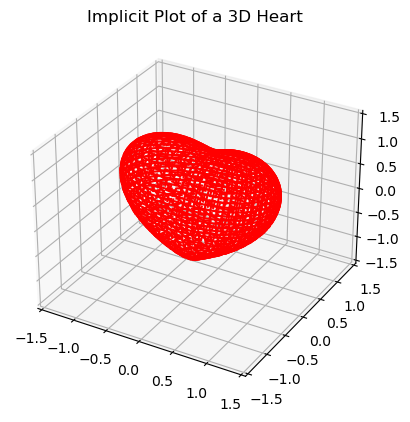

In [9]:
import matplotlib.pyplot as plt
import numpy as np


def heart_3d(x, y, z):
    return (x**2 + (9 / 4) * y**2 + z**2 - 1)**3 - x**2 * z**3 - (9 / 80) * y**2 * z**3


def plot_implicit(fn, bbox=(-1.5, 1.5)):
    xmin, xmax, ymin, ymax, zmin, zmax = bbox * 3
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 100)  # resolution of the contour
    B = np.linspace(xmin, xmax, 40)  # number of slices
    A1, A2 = np.meshgrid(A, A)  # grid on which the contour is plotted

    for z in B:  # plot contours in the XY plane
        X, Y = A1, A2
        Z = fn(X, Y, z)
        cset = ax.contour(X, Y, Z + z, [z], zdir='z', colors='red')
        # [z] defines the only level to plot
        # for this contour for this value of z

    for y in B:  # plot contours in the XZ plane
        X, Z = A1, A2
        Y = fn(X, y, Z)
        cset = ax.contour(X, Y + y, Z, [y], zdir='y', colors='red')

    for x in B:  # plot contours in the YZ plane
        Y, Z = A1, A2
        X = fn(x, Y, Z)
        cset = ax.contour(X + x, Y, Z, [x], zdir='x', colors='red')

    # Set plot limits
    ax.set_zlim3d(zmin, zmax)
    ax.set_xlim3d(xmin, xmax)
    ax.set_ylim3d(ymin, ymax)

    plt.title('Implicit Plot of a 3D Heart')
    plt.show()
